<h1 style="text-align:center">Mass-Spring-Damper System with Direct Force Input</h1>
<h3 style="text-align:center"> MCHE 485: Mechanical Vibrations</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpringDamper_DirectForce_Horiz.png" alt="A Direct-Force Mass-Spring-Damper System" width=50%/></a><br>
    <strong> Figure 1: A Direct Force Mass-Spring-Damper System </strong>
</p>

This notebook simluates the free vibration of a simple mass-spring-damper system like the one shown in Figure 1. More specifically, we'll look at how system response to non-zero initial conditions. 

The equation of motion for the system is:

$ \quad m \ddot{x} + c \dot{x} + kx = f $

We could also rewrite this equation by dividing by the mass, $m$.

$ \quad \ddot{x} + \frac{c}{m}\dot{x} + \frac{k}{m}x = \frac{f}{m}$

or equivalently:

$ \quad \ddot{x} = - \frac{k}{m}x - \frac{c}{m}\dot{x} + \frac{f}{m}$

For information on how to obtain this equation, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

To simluate this system using a numerical solver, we need to rewrite this equation of motion, which is a 2nd-order differential equation, as a system of 1st-order differential equations.

To do so, define a state vector as $ \bar{w} = \left[x \ \dot{x}\right]^T $. We can also define an input vector as  $\bar{u} = \left[f \right]$. Since we only have one input to this system, the input vector only has one element.

Then, the system of first-order ODEs we have to solve is:

$ \quad \dot{\bar{w}} = g(\bar{w}, \bar{u}, t) $

Writing these out, we have:

$ \quad \dot{\bar{w}}  = \left[\dot{x} \right.$

$\phantom{\quad \dot{\bar{w}}  = \left[\right.}\left. -\frac{k}{m}x - \frac{c}{m}\dot{x} - \frac{f}{m}\right] $

Now, we can use that system of 1st-order differential equations to simulate the system.

To begin we will import the NumPy library, the matplotlib plotting library, and the ```odeint``` ODE solver from the SciPy library.

In [5]:
import numpy as np              # Grab all of the NumPy functions with nickname np

In [6]:
%matplotlib inline

# Import the plotting functions 
import matplotlib.pyplot as plt

In [7]:
# Import the ODE solver
from scipy.integrate import odeint

We need to define two functions for the differential equation solver to use. The first is just the system of differential equations to solve. I've defined it below by ```eq_of_motion()```. It is just the system of equations we wrote above. The second is the input force as a function of time. I have called it ```f()``` below. Here, it is just a pulse input in force, lasting 0.5 second.

In [8]:
def eq_of_motion(w, t, p):
    """
    Defines the differential equations for the direct-force mass-spring-damper system.

    Arguments:
        w :  vector of the state variables:
        t :  time
        p :  vector of the parameters:
    """
    x, x_dot = w
    m, k, c, StartTime, F_amp = p

    # Create sysODE = (x', x_dot')
    sysODE = [x_dot,
              -k/m * x - c/m * x_dot + f(t, p)/m]
    return sysODE


def f(t, p):
    """
    defines the disturbance force input to the system
    """
    m, k, c, StartTime, F_amp = p
    
    # Select one of the two inputs below
    # Be sure to comment out the one you're not using
    
    # Input Option 1: 
    #    Just a step in force beginning at t=DistStart
    # f = F_amp * (t >= DistStart)
    
    # Input Option 2:
    #    A pulse in force beginning at t=StartTime and ending at t=(StartTime + 0.5)
    f = F_amp * (t >= StartTime) * (t <= StartTime + 0.5)
    
    return f

In [9]:
# Define the System Parameters
m = 1.0                     # kg
k = (2.0 * np.pi)**2        # N/m (Selected to give an undamped natrual frequency of 1Hz)
wn = np.sqrt(k / m)         # Natural Frequency (rad/s)

z = 0.1                     # Define a desired damping ratio
c = 2 * z * wn * m          # calculate the damping coeff. to create it (N/(m/s))

In [10]:
# Set up simulation parameters

# ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 10.0
numpoints = 10001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.0, stoptime, numpoints)

# Initial conditions
x_init = 0.0                        # initial position
x_dot_init = 0.0                    # initial velocity

# Set up the parameters for the input function
StartTime = 0.5              # Time the f(t) input will begin
F_amp = 10.0                # Amplitude of Disturbance force (N)

# Pack the parameters and initial conditions into arrays 
p = [m, k, c, StartTime, F_amp]
x0 = [x_init, x_dot_init]

Now, we will actually call the ode solver, using the ```odeint()``` function from the SciPy library. For more information on ```odeint```, see [the SciPy documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).

In [11]:
# Call the ODE solver.
resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

The solver returns the time history of each state. To plot an individual response, we just simply pick the corresponding column. Below, we'll plot the position of the mass as a function of time.

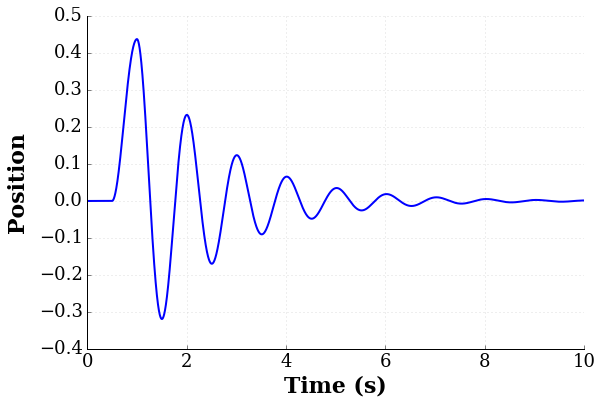

In [12]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position', family='serif', fontsize=22, weight='bold', labelpad=10)

# Plot the first element of resp for all time. It corresponds to the position.
plt.plot(t, resp[:,0], linewidth=2, linestyle = '-', label=r'Response')

# uncomment below and set limits if needed
# xlim(0,5)
# ylim(0,10)

# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad = 0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE485_DirectForcePulseWithDamping.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

<hr class = "style-end">

#### Licenses
Code is licensed under a 3-clause BSD-style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [13]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(open(css_file, "r").read())

FileNotFoundError: [Errno 2] No such file or directory: 'styling/CRAWLAB_IPythonNotebook.css'